In [1]:
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)  
sns.set(style="whitegrid")

In [2]:
BASE_DIR = Path(os.getcwd()).resolve().parent
PROCESSED_DATA_PATH = BASE_DIR / "data" / "processed"
LOGS_PATH = BASE_DIR / "logs"

# Ensure processed and logs folders exist
PROCESSED_DATA_PATH.mkdir(parents=True, exist_ok=True)
LOGS_PATH.mkdir(parents=True, exist_ok=True)    

ratings = pd.read_csv(PROCESSED_DATA_PATH / "ratings.csv")
movies = pd.read_csv(PROCESSED_DATA_PATH / "movies.csv")
users = pd.read_csv(PROCESSED_DATA_PATH / "users.csv")

In [3]:
display(ratings.head())
display(movies.head())
display(users.head())

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,userId,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
print(f"Ratings dataset shape: {ratings.shape}")
print(f"Movies dataset shape: {movies.shape}")
print(f"Users dataset shape: {users.shape}")

Ratings dataset shape: (1000209, 4)
Movies dataset shape: (3883, 3)
Users dataset shape: (6040, 5)


In [5]:
print("Missing values in Ratings dataset:")
print(ratings.isnull().sum())


Missing values in Ratings dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [24]:
print(movies.head())

   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [25]:
print(movies['title'].head(10))

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
5                           Heat (1995)
6                        Sabrina (1995)
7                   Tom and Huck (1995)
8                   Sudden Death (1995)
9                      GoldenEye (1995)
Name: title, dtype: object


In [6]:
print("Missing values in Movies dataset:")
print(movies.isnull().sum())


Missing values in Movies dataset:
movieId    0
title      0
genres     0
dtype: int64


In [7]:
print("Missing values in Users dataset:")
print(users.isnull().sum())

Missing values in Users dataset:
userId        0
gender        0
age           0
occupation    0
zip           0
dtype: int64


In [8]:
print(ratings['rating'].describe())

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [9]:
print(f"Number of unique users: {ratings['userId'].nunique()}")
print(f"Number of unique movies: {ratings['movieId'].nunique()}")

Number of unique users: 6040
Number of unique movies: 3706


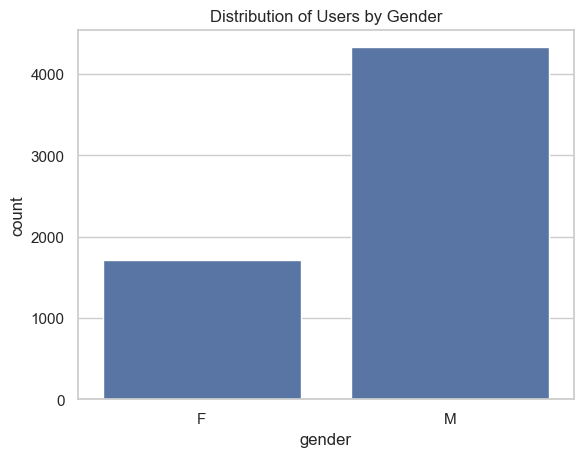

In [10]:
sns.countplot(data=users, x='gender')
plt.title("Distribution of Users by Gender")
plt.show()

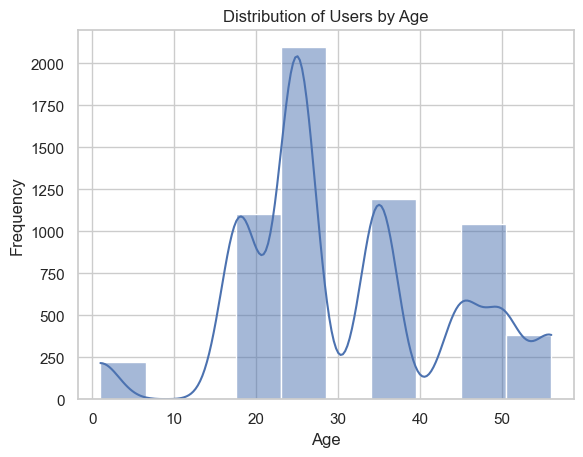

In [11]:
sns.histplot(data=users, x='age', bins=10, kde=True)
plt.title("Distribution of Users by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

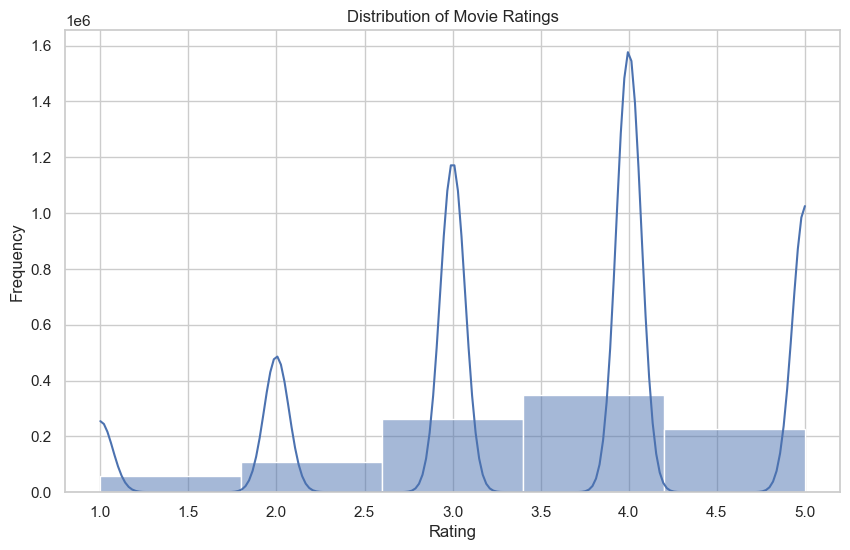

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ratings, x='rating', bins=5, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

In [13]:
top_movies = ratings.groupby('movieId').size().reset_index(name='rating_count')
top_movies = top_movies.sort_values(by='rating_count', ascending=False).head(10)
top_movies = pd.merge(top_movies, movies, on='movieId')



C:\Users\Sandra Kimiring\AppData\Local\Temp\ipykernel_18748\706138165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=top_movies, palette='viridis')


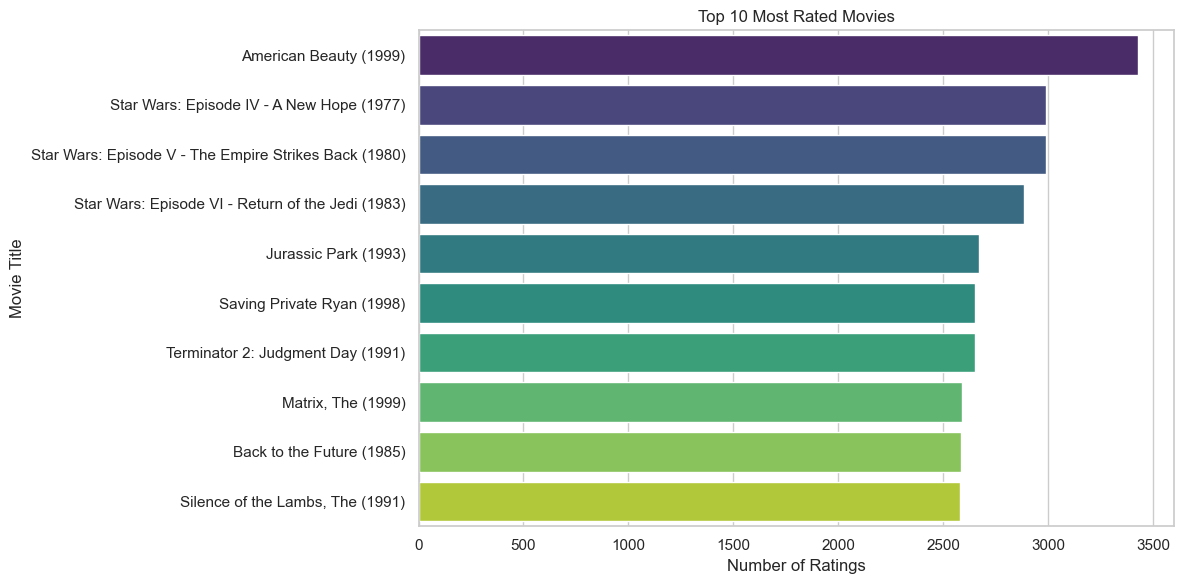

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='title', data=top_movies, palette='viridis')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Rated Movies')
plt.tight_layout()
plt.show()

C:\Users\Sandra Kimiring\AppData\Local\Temp\ipykernel_18748\2494839261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=low_rated_movies, palette='viridis')


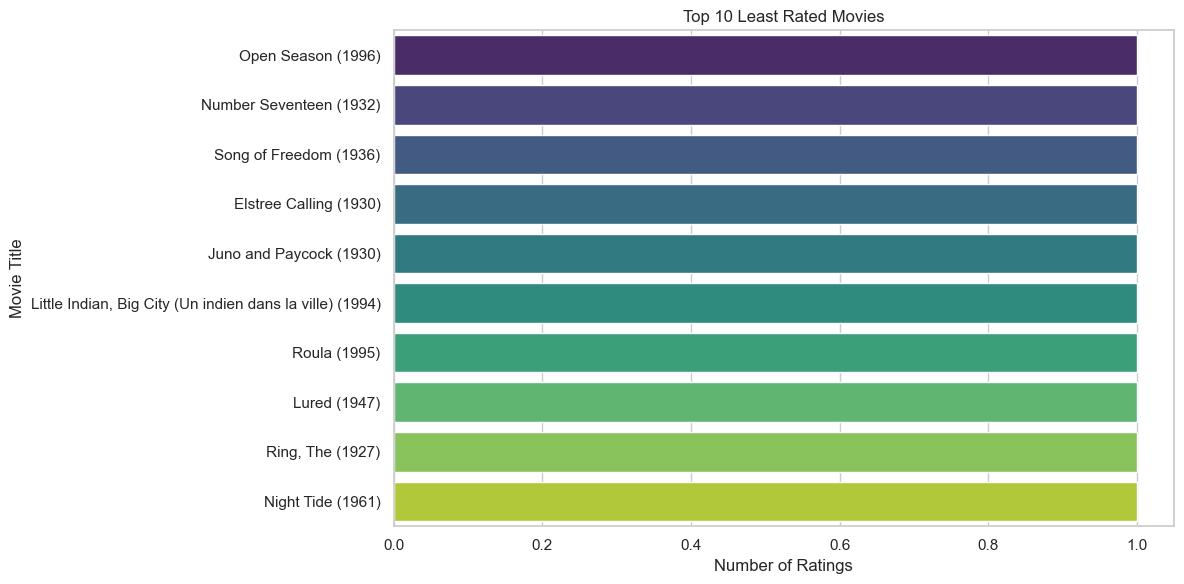

In [15]:
low_rated_movies = ratings.groupby('movieId').size().reset_index(name='rating_count')
low_rated_movies = low_rated_movies.sort_values(by='rating_count', ascending=True).head(10)
low_rated_movies = pd.merge(low_rated_movies, movies, on='movieId')

plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='title', data=low_rated_movies, palette='viridis')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Least Rated Movies')
plt.tight_layout()
plt.show()

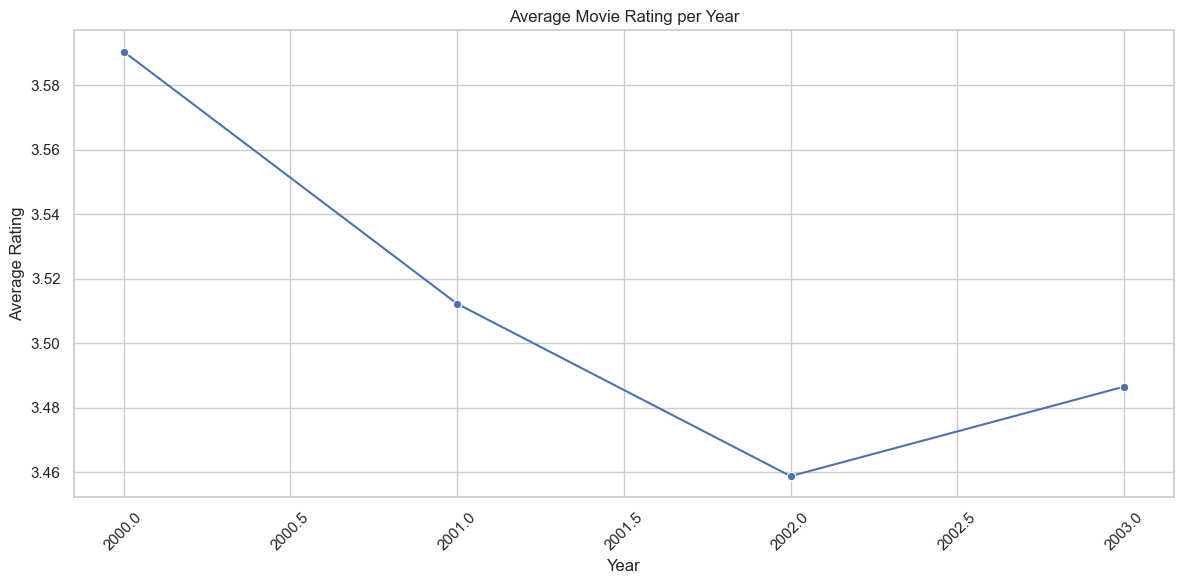

In [16]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year
average_rating_per_year = ratings.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=average_rating_per_year, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

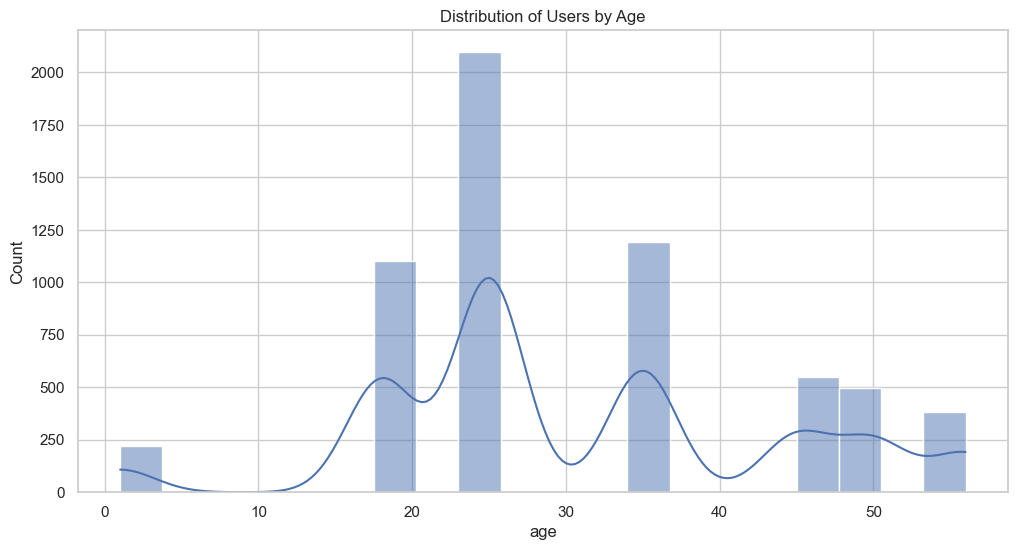

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data=users, x='age', bins=20, kde=True)
plt.title("Distribution of Users by Age")
plt.show()

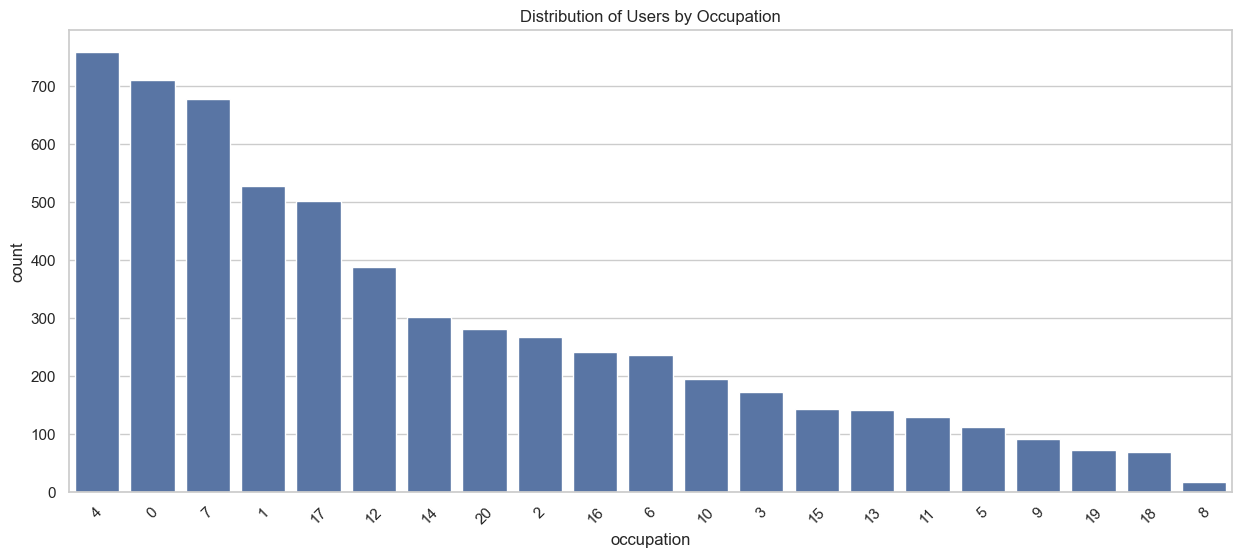

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(data=users, x='occupation', order=users['occupation'].value_counts().index)
plt.title("Distribution of Users by Occupation")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sandra Kimiring\AppData\Local\Temp\ipykernel_18748\3418702517.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_genres.index, y=top_n_genres.values, palette='viridis')


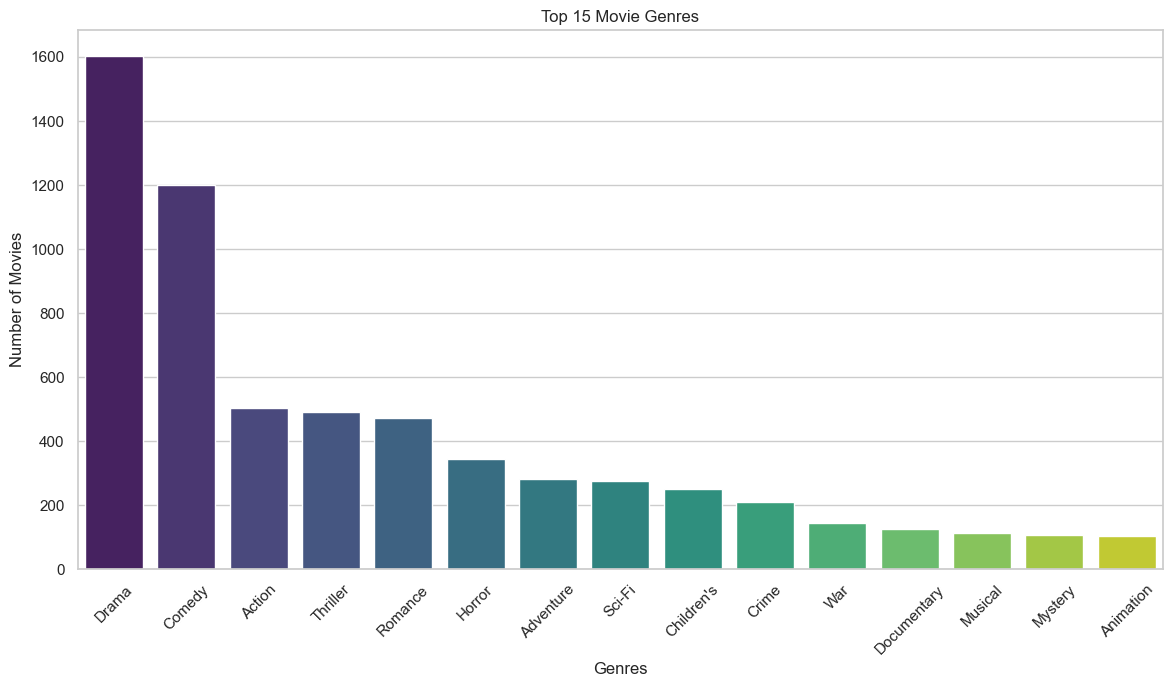

In [19]:
genres = movies['genres'].str.get_dummies(sep='|')
genre_counts = genres.sum().sort_values(ascending=False)
top_n_genres = genre_counts.head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_n_genres.index, y=top_n_genres.values, palette='viridis')
plt.title("Top 15 Movie Genres")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.show()

In [20]:
# Merge ratings with movies
ratings_movies = ratings.merge(movies, on='movieId', how='left')

# Merge with users if needed
full_data = ratings_movies.merge(users, on='userId', how='left')

display(full_data.head())


,userId,movieId,rating,timestamp,year,title,genres,gender,age,occupation,zip
0,1,1193,5,2000-12-31 22:12:40,2000,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,2000-12-31 22:35:09,2000,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,2000-12-31 22:32:48,2000,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,2000-12-31 22:04:35,2000,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,2001-01-06 23:38:11,2001,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [21]:
average_rating_by_genre = full_data.groupby(['age','gender'])['rating'].mean().unstack()
print(average_rating_by_genre)

gender         F         M
age                       
1       3.616291  3.517461
18      3.453145  3.525476
25      3.606700  3.526780
35      3.659653  3.604434
45      3.663044  3.627942
50      3.797110  3.687098
56      3.915534  3.720327


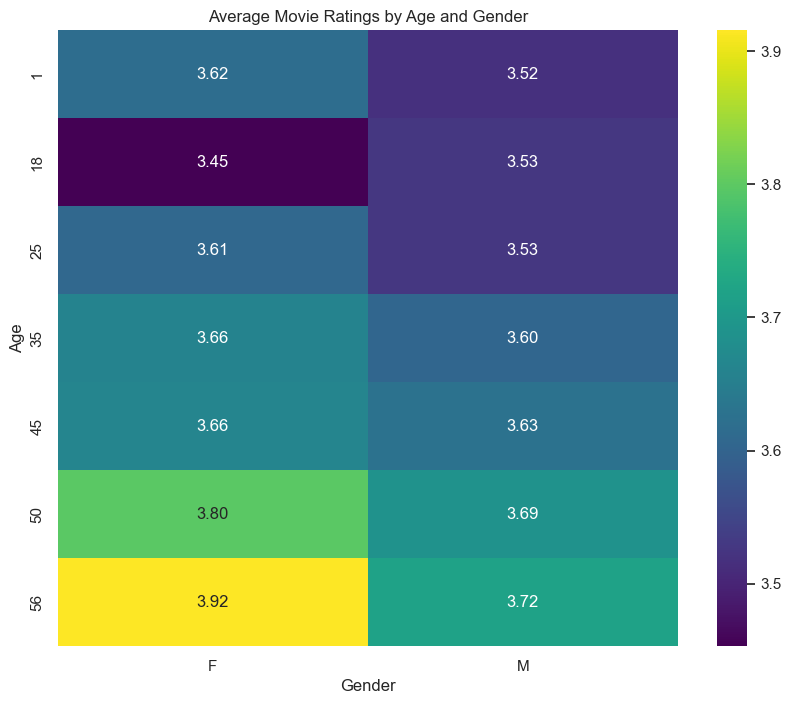

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(average_rating_by_genre, annot=True, fmt=".2f", cmap="viridis")
plt.title("Average Movie Ratings by Age and Gender")
plt.xlabel("Gender")
plt.ylabel("Age")       
plt.show()

In [23]:
genres_melted = genres.reset_index().melt(id_vars='movieId', var_name='genre', value_name='value')
genres_melted = genres_melted[genres_melted['value'] == 1]
genres_melted =  genres_melted.rename(columns={'index': 'movieId'})

genre_rating = pd.merge(full_data, genres_melted, on='movieId')
average_rating_by_genre = genre_rating.groupby('genre')['rating'].mean().reset_index()
top_10_genres_by_rating = average_rating_by_genre.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='genre', data=top_10_genres_by_rating, palette='viridis')
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['movieId']"

In [ ]:
average_rating_by_occupation = full_data.groupby('occupation')['rating'].mean().reset_index()
average_rating_by_occupation = average_rating_by_occupation.sort_values(by='rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y=average_rating_by_occupation.index, data=average_rating_by_occupation, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Occupation')
plt.title('Average Movie Rating by Occupation')
plt.tight_layout()
plt.show()